In [1]:
"""Lean Project Valuation Model - Sensitivity Analysis
"""

import numpy as np
from numpy.random import RandomState
import pandas as pd
from matplotlib import pyplot as plt

from processes import GeometricBrownianMotion
from lpv import LeanProjectValuation

# Plotting constants
FIGSIZE = (8,6)


# Sensitivity Analysis - Project Volatility

## Research Questions

1. How does project volaitility vary with the volaility of the underlying expected cashflow?

Here we analyze the volatility of the expected cashflows along with pivot shocks, first removing the pivot shocks to see that their volatilities are equal and second introducing pivot shocks.


In [2]:
# Default Simulation Parameters
N = 10000      # no simulations
T = 3          # simulation periods
STEP = 365     # timesteps per period
TIME_ARRAY = np.linspace(0, T, STEP*T+1)
SEED = 1234

# Parameters
CF_INIT = 1.0
K = 1.0
CF_MU = 0.02
CF_SIGMA = 0.2
R = 0.05

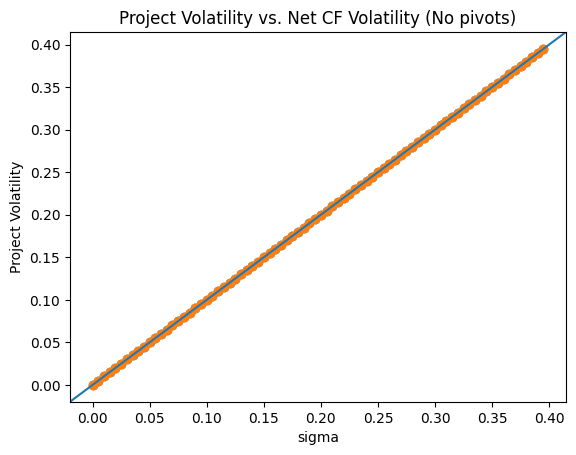


Plotting project volatility as a function of cashflow volatility (sigma) with the following parameters held constant:


Initial Estimated Cashflow: 1.0

Cashflow Drift (mu): 0.02

Development Cost per Investment: 1.0

Interest Rate (r): 0.05

No. Simulations (N): 10000




In [3]:
# Project Vol as a fn of Cashflow Vol
N = 10000
ra = np.arange(0, 0.4, 0.005)
projects = [LeanProjectValuation(CF_MU,
                                 sigma,
                                 CF_INIT,
                                 K,
                                 R, 
                                 rand_seed=SEED,
                                 no_sims=N,
                                 disable_pivots=True) for sigma in ra]
stdevs = [p.volatility(TIME_ARRAY, 3) for p in projects]
naive_stdevs = [p.volatility(TIME_ARRAY, 3, unaltered=True) for p in projects]

# Plot results
plt.title("Project Volatility vs. Net CF Volatility (No pivots)")
plt.xlabel("sigma")
plt.ylabel("Project Volatility")
plt.scatter(ra, stdevs)
plt.scatter(ra, naive_stdevs)

description=f"""
Plotting project volatility as a function of cashflow volatility (sigma) with the following parameters held constant:\n\n
Initial Estimated Cashflow: {CF_INIT}\n
Cashflow Drift (mu): {CF_MU}\n
Development Cost per Investment: {K}\n
Interest Rate (r): {R}\n
No. Simulations (N): {N}\n
"""

# 45 degree line
plt.axline((0,0),slope=1)

plt.show()
print(description)

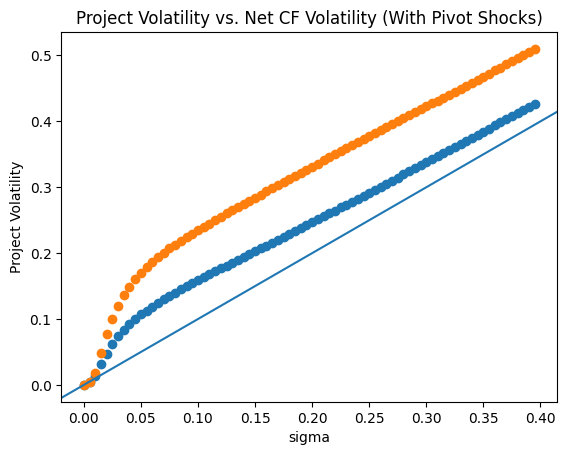


Plotting project volatility as a function of cashflow volatility (sigma) with the following parameters held constant:


Initial Estimated Cashflow: 1.0

Cashflow Drift (mu): 0.02

Development Cost per Investment: 1.0

Interest Rate (r): 0.05

No. Simulations (N): 10000




In [4]:
# Project Vol as a fn of Cashflow Vol
N = 10000
ra = np.arange(0, 0.4, 0.005)
projects = [LeanProjectValuation(CF_MU,
                                 sigma,
                                 CF_INIT,
                                 K,
                                 R, 
                                 rand_seed=SEED,
                                 no_sims=N,
                                 disable_pivots=False) for sigma in ra]
stdevs = [p.volatility(TIME_ARRAY, 3) for p in projects]
naive_stdevs = [p.volatility(TIME_ARRAY, 3, unaltered=True) for p in projects]

# Plot results
plt.title("Project Volatility vs. Net CF Volatility (With Pivot Shocks)")
plt.xlabel("sigma")
plt.ylabel("Project Volatility")
plt.scatter(ra, stdevs)
plt.scatter(ra, naive_stdevs)

description=f"""
Plotting project volatility as a function of cashflow volatility (sigma) with the following parameters held constant:\n\n
Initial Estimated Cashflow: {CF_INIT}\n
Cashflow Drift (mu): {CF_MU}\n
Development Cost per Investment: {K}\n
Interest Rate (r): {R}\n
No. Simulations (N): {N}\n
"""

# 45 degree line
plt.axline((0,0),slope=1)

plt.show()
print(description)